In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

dataset=pd.read_csv("D:\\forestfires.csv")

x2 = dataset.iloc[:,0:10].values
y2 = dataset.iloc[:,10].values



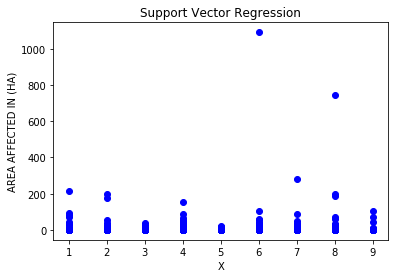

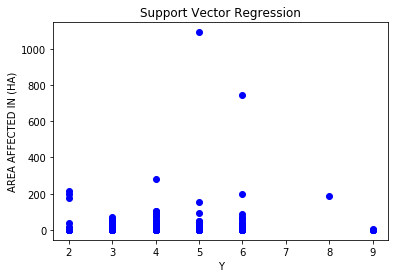

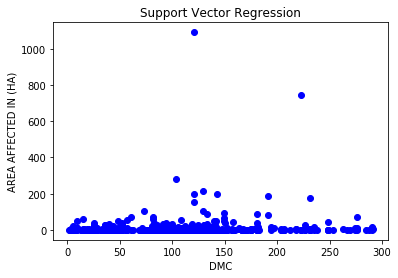

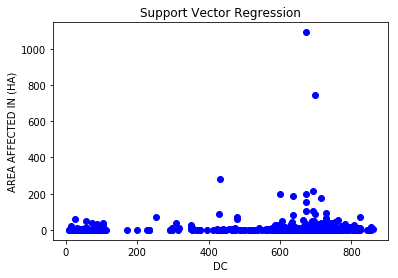

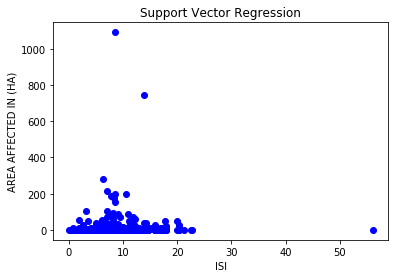

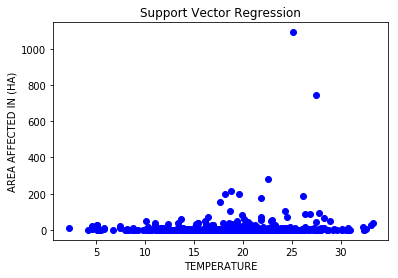

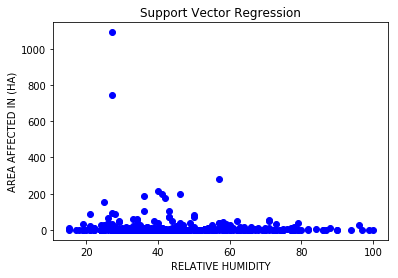

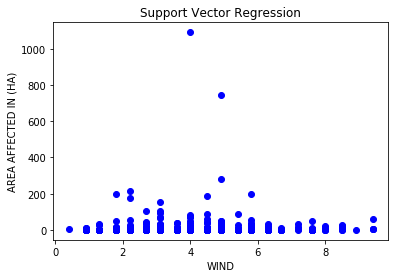

In [11]:
arr=['X','Y','months','days','DMC','DC','ISI','TEMPERATURE','RELATIVE HUMIDITY','WIND']
for i in range(10):
    if(i==2 or i==3):
        continue
    else:
        x1=x2[:,i]
        plt.scatter(x1,y2,color='blue')
        plt.xlabel(arr[i])
        plt.ylabel('AREA AFFECTED IN (HA)')
        plt.title('Support Vector Regression')
        plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025722E0DC50>,
      dtype=object)

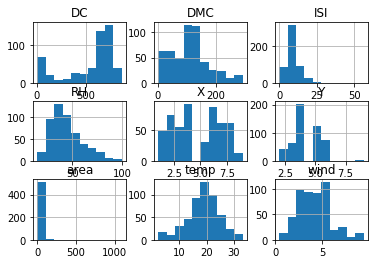

In [12]:
dataset.hist()

In [13]:
dataset1=pd.read_csv("D:\\forestfires1.csv")

Text(0, 0.5, 'AREA AFFECTED IN (HA)')

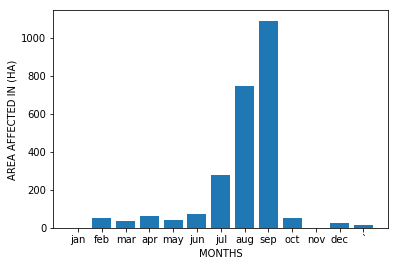

In [14]:
x1=dataset1.iloc[:,2]
y1=dataset1.iloc[:,10].values
x2=dataset1.iloc[:,3]
plt.bar(x1,y1)
plt.xlabel('MONTHS')
plt.ylabel('AREA AFFECTED IN (HA)')

Text(0, 0.5, 'AREA AFFECTED IN (HA)')

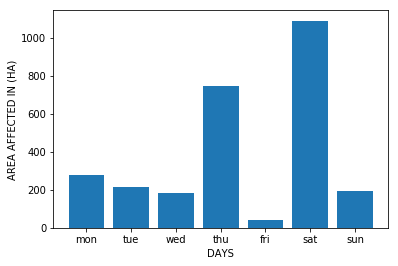

In [15]:
plt.bar(x2,y1)
plt.xlabel('DAYS')
plt.ylabel('AREA AFFECTED IN (HA)')


In [16]:
le = LabelEncoder()

dataset['month']=le.fit_transform(dataset['month'])
dataset['day']=le.fit_transform(dataset['day'])
dataset.isnull().any()

x = dataset.iloc[:,0:10].values
y = dataset.iloc[:,10].values


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0) 

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scalar = StandardScaler()
model= SVR()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_pred, y_test)
msg = " %f (%f)" % ( score, mae)
print(msg)



 -0.000246 (20.120627)


C:\Users\raksh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:\Users\raksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


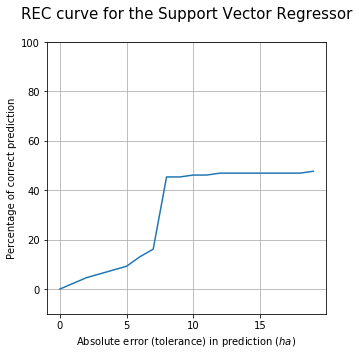

In [17]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

tol_max=20
rec_SVR=[]
for i in range(tol_max):
    rec_SVR.append(rec(y_pred,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Support Vector Regressor\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)


In [36]:
x_test[1,:]
y_pred[1]

0.9248051429609356

In [42]:

prediction = model.predict(x_test[1:2,:])
prediction


AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(categorical_features = [2])
x = one.fit_transform(x).toarray()
x=x[:,1:]

from sklearn.preprocessing import OneHotEncoder
one1 = OneHotEncoder(categorical_features = [14])
x = one1.fit_transform(x).toarray()
x=x[:,1:]
